<a href="https://colab.research.google.com/github/HectorAbraham/Ecs.-Dif.-Parciales/blob/main/Series_de_Fourier_Generalizadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sympy as sp
sp.init_printing()

#Definimos variables simbólicas
x, lam = sp.symbols('x lambda')
f = sp.Function('f')

# Ecuación diferencial del problema
ode = sp.Eq(f(x).diff(x, 2) + 2*f(x).diff(x) + lam*f(x), 0)
ode


                       2           
           d          d            
λ⋅f(x) + 2⋅──(f(x)) + ───(f(x)) = 0
           dx           2          
                      dx           

In [3]:
# Reescribimos la ecuación en la forma estándar de Sturm-Liouville:
# d/dx[p(x) df/dx] + [lambda * r(x) - q(x)]f = 0
# Donde: p(x) = e^{2x}, q(x) = 0, r(x) = e^{2x}

px = sp.exp(2*x)
lhs = px * (f(x).diff(x, 2) + 2*f(x).diff(x) + lam*f(x))
lhs_simplified = sp.simplify(lhs)
lhs_simplified


⎛                       2       ⎞     
⎜           d          d        ⎟  2⋅x
⎜λ⋅f(x) + 2⋅──(f(x)) + ───(f(x))⎟⋅ℯ   
⎜           dx           2      ⎟     
⎝                      dx       ⎠     

In [4]:
# Resolvemos la ecuación característica

r = sp.symbols('r')
char_eq = sp.Eq(r**2 + 2*r + lam, 0)
sol_r = sp.solve(char_eq, r)
sol_r


⎡    _______        _______    ⎤
⎣- ╲╱ 1 - λ  - 1, ╲╱ 1 - λ  - 1⎦

In [5]:
# Solución general y condiciones de frontera

r1, r2 = sol_r
C1, C2 = sp.symbols('C1 C2')
f_gen = C1*sp.exp(r1*x) + C2*sp.exp(r2*x)

# Condiciones: f(0) = 0, f(1) = 0
eq1 = sp.Eq(f_gen.subs(x, 0), 0)
eq2 = sp.Eq(f_gen.subs(x, 1), 0)
sol_C = sp.solve([eq1, eq2], [C1, C2])
sol_C


{C₁: 0, C₂: 0}

In [6]:
# Encontrar los autovalores lambda_n

# Igualamos la condición: que el sistema tenga soluciones no triviales

mu = sp.symbols('mu', real=True, positive=True)
r1 = -1 + sp.I*mu
r2 = -1 - sp.I*mu
f_gen_complex = C1*sp.exp(r1*x) + C2*sp.exp(r2*x)

# Imponemos condiciones de frontera en f_gen_complex

bc1 = f_gen_complex.subs(x, 0)
bc2 = f_gen_complex.subs(x, 1)

# El sistema homogéneo tiene soluciones no triviales si el determinante se anula

A = sp.Matrix([[sp.exp(r1*0), sp.exp(r2*0)],
               [sp.exp(r1*1), sp.exp(r2*1)]])
detA = A.det().simplify()
detA


⎛     2⋅ⅈ⋅μ⎞  -ⅈ⋅μ - 1
⎝1 - ℯ     ⎠⋅ℯ        

In [7]:
# Resolver det = 0 para encontrar valores de mu

mu_sol = sp.solve(sp.im(detA), mu)
mu_sol


[π]

In [10]:
# Encontrar funciones propias

n = sp.symbols('n', integer=True, positive=True)
mu_n = n*sp.pi
lam_n = mu_n**2 + 1
# f_n(x) = e^{-x} * sin(n*pi*x)

f_n = sp.exp(-x) * sp.sin(n*sp.pi*x)
f_n


 -x           
ℯ  ⋅sin(π⋅n⋅x)

In [9]:
# Serie de Fourier generalizada para u(x) = e^{-x}

u = sp.exp(-x)

# Producto interno ponderado con peso r(x) = e^{2x}

r_x = sp.exp(2*x)
a_n = (sp.integrate(u * f_n * r_x, (x, 0, 1)) /
       sp.integrate(f_n**2 * r_x, (x, 0, 1))).simplify()
a_n


  ⎛        n⎞
2⋅⎝1 - (-1) ⎠
─────────────
     π⋅n     

In [26]:
# Construir la serie truncada

series = sum(a_n.subs(n, k) * f_n.subs(n, k) for k in range(1, 10))
series.simplify()


                                                                               ↪
4⋅(315⋅sin(π⋅x) + 105⋅sin(3⋅π⋅x) + 63⋅sin(5⋅π⋅x) + 45⋅sin(7⋅π⋅x) + 35⋅sin(9⋅π⋅ ↪
────────────────────────────────────────────────────────────────────────────── ↪
                                        315⋅π                                  ↪

↪      -x
↪ x))⋅ℯ  
↪ ───────
↪        

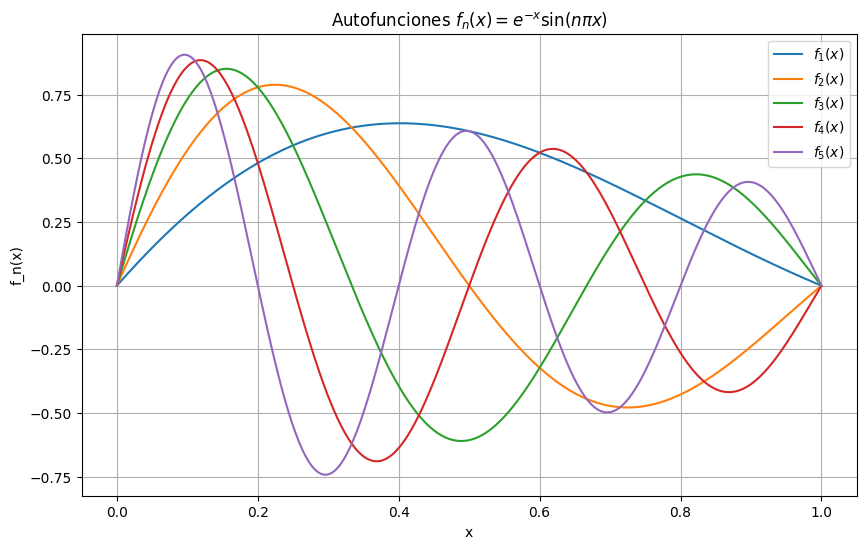

In [27]:
# Graficar algunas autofunciones f_n(x) = e^{-x} sin(nπx)
import numpy as np
import matplotlib.pyplot as plt

x_vals = np.linspace(0, 1, 400)
plt.figure(figsize=(10, 6))

for n_val in range(1, 6):
    f_n_func = sp.lambdify(x, sp.exp(-x) * sp.sin(n_val * sp.pi * x), modules='numpy')
    plt.plot(x_vals, f_n_func(x_vals), label=f'$f_{n_val}(x)$')

plt.title("Autofunciones $f_n(x) = e^{-x} \sin(n \pi x)$")
plt.xlabel('x')
plt.ylabel('f_n(x)')
plt.grid(True)
plt.legend()
plt.show()


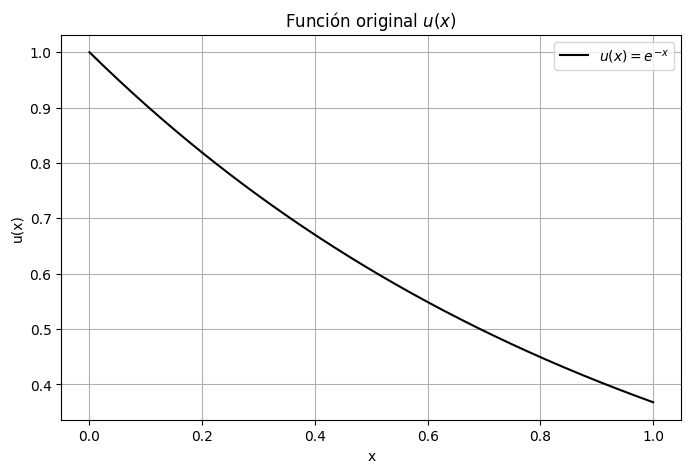

In [28]:
# Graficar u(x) = e^{-x}
u_func = sp.lambdify(x, u, 'numpy')

plt.figure(figsize=(8, 5))
plt.plot(x_vals, u_func(x_vals), label='$u(x) = e^{-x}$', color='black')
plt.title('Función original $u(x)$')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.grid(True)
plt.legend()
plt.show()


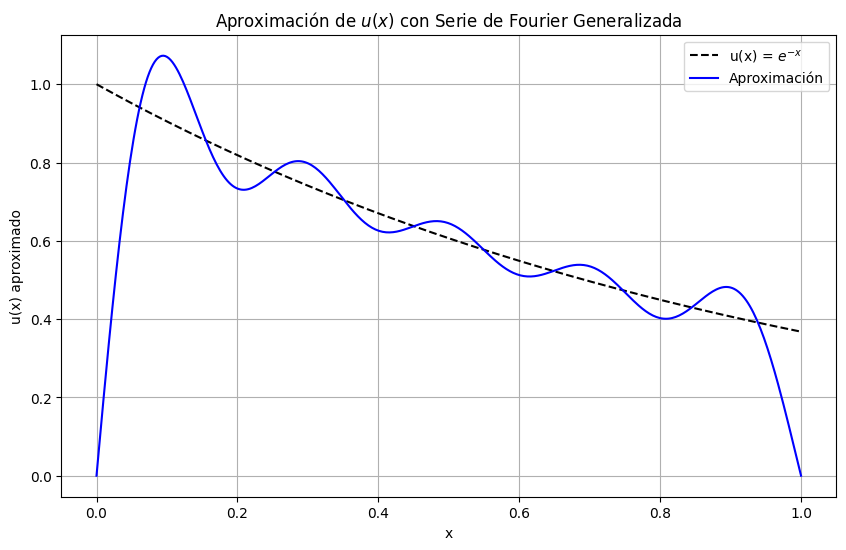

In [29]:
# Graficar la aproximación de u(x) con la serie de Fourier generalizada

series_func = sp.lambdify(x, series, modules='numpy')

plt.figure(figsize=(10, 6))
plt.plot(x_vals, u_func(x_vals), label='u(x) = $e^{-x}$', color='black', linestyle='--')
plt.plot(x_vals, series_func(x_vals), label='Aproximación', color='blue')
plt.title('Aproximación de $u(x)$ con Serie de Fourier Generalizada')
plt.xlabel('x')
plt.ylabel('u(x) aproximado')
plt.grid(True)
plt.legend()
plt.show()
